# Inspiration


Suppose you have customers data and 1 lakh tk for marketing expenses. Now find a better way to expend the money using customer data.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv('data/mall_data.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data
This dataset contains the basic information :
- ID, 
- Age, 
- Gender, 
- Annual Income, 
- Spending Score 

about the customers

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Missing data
Good thing about this dataset is zero missing data.

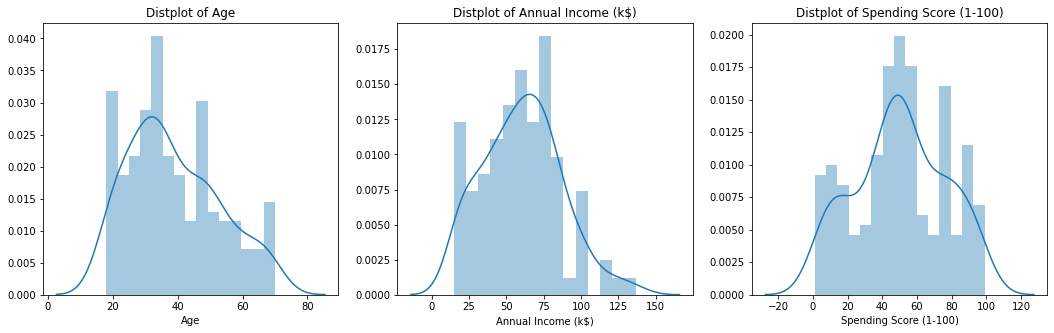

In [24]:
plt.figure(1 , figsize = (18 , 5))
n = 0 
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for x in cols:
    n += 1
    plt.subplot(1 , 3 , n)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

># Task #1:
Explain the distributions.

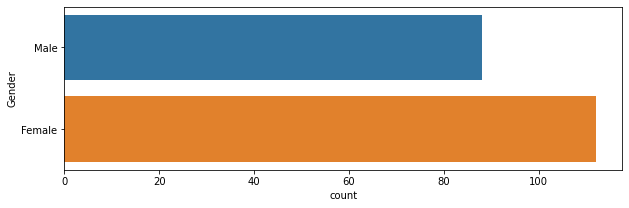

In [25]:
plt.figure(1 , figsize = (10 , 3))
sns.countplot(y = 'Gender', data = df)
plt.show()

># Task #2:
Explain the countplot.

### Let's check correlation

We will use this table to explain/interpret correlation:

<img src="data/corr.png">

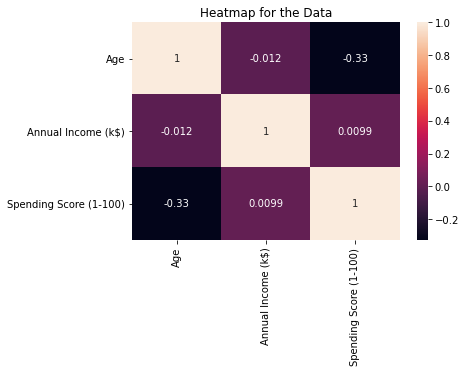

In [41]:
sns.heatmap(df[cols].corr(), annot = True)
plt.title('Heatmap for the Data')
plt.show()

># Task #3
Explain the heatmap

['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']


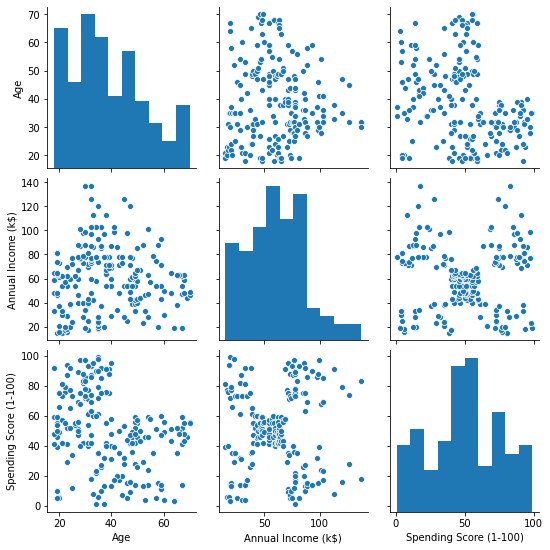

In [27]:
print(cols)
sns.pairplot(df[cols])

['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']


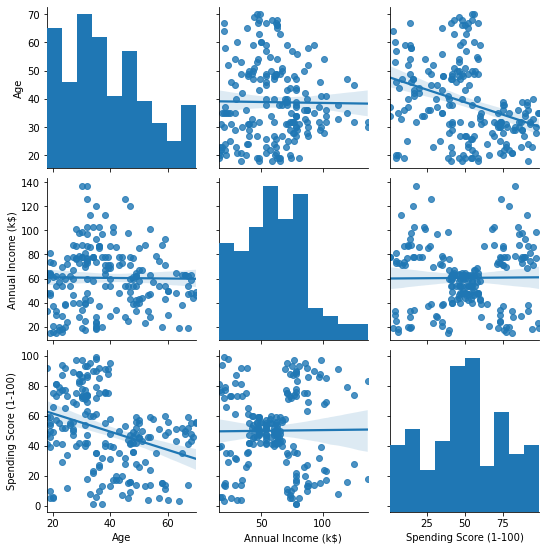

In [34]:
print(cols)
sns.pairplot(df[cols], kind="reg")

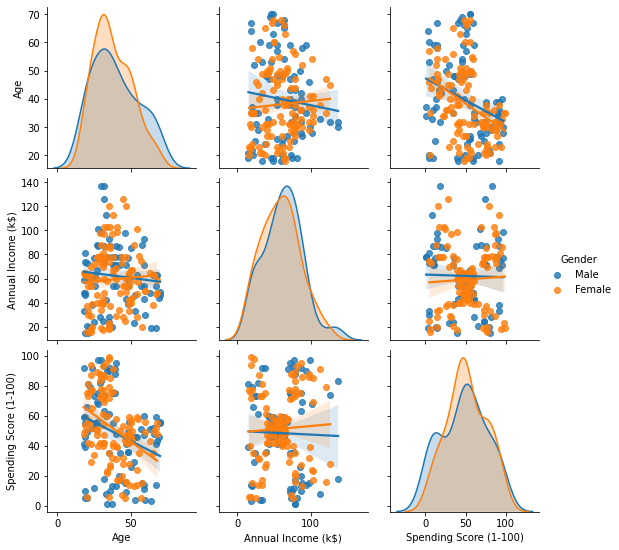

In [36]:
sns.pairplot(df[cols], hue="Gender", kind="reg")

># Task #4
Explain the pairplot with hue and reg

### Let's do segmentation

In [43]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
cols

['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']

In [47]:
df['Gender'] = df['Gender'].map({'Male': 0,'Female': 1})
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [79]:
pca = PCA(n_components=2)
points = pca.fit_transform(df[cols])

In [80]:
df['com_1'] = points[:,0]
df['com_2'] = points[:,1]

In [81]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),com_1,com_2
0,1,0,19,15,39,-31.869945,-33.001252
1,2,0,21,15,81,0.764494,-56.842901
2,3,1,20,16,6,-57.408276,-13.124961
3,4,1,23,16,77,-2.168543,-53.478590
4,5,1,31,17,40,-32.174085,-30.388412
...,...,...,...,...,...,...,...
195,196,1,35,120,79,58.352515,31.017542
196,197,1,45,126,28,19.908001,66.446108
197,198,0,32,126,74,58.520804,38.346039
198,199,0,32,137,18,20.979130,79.376405


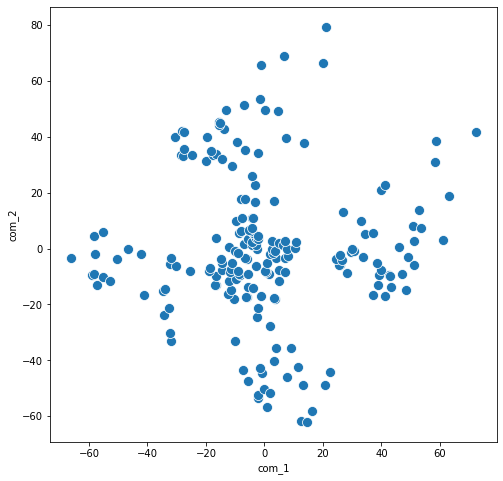

In [83]:
plt.figure(1 , figsize = (8, 8))
sns.scatterplot(x='com_1', y='com_2', data=df, s=100)

In [89]:
tsne = TSNE(n_components=2,  n_iter=1000)
points = tsne.fit_transform(df[cols])

In [90]:
df['t_com_1'] = points[:,0]
df['t_com_2'] = points[:,1]

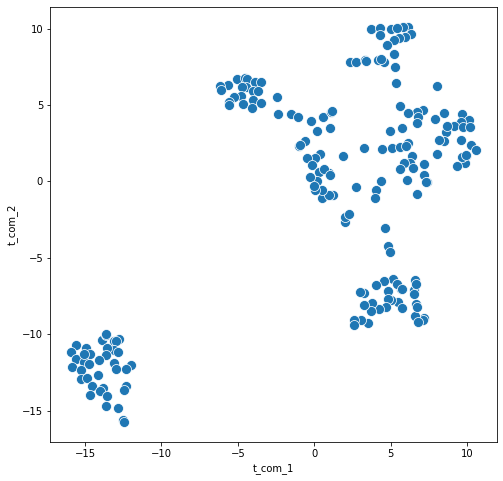

In [91]:
plt.figure(1 , figsize = (8, 8))
sns.scatterplot(x='t_com_1', y='t_com_2', data=df, s=100)

# Elbow Method

<img src="data/elbow.png">

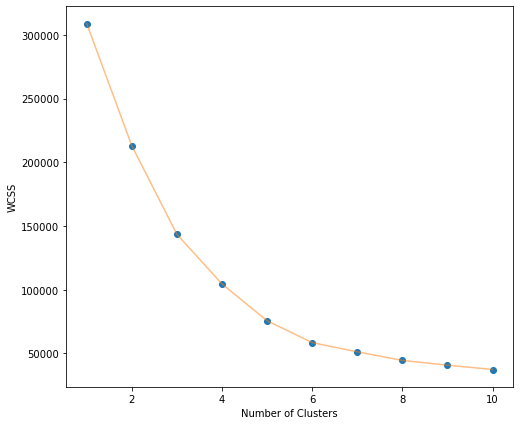

In [99]:
from sklearn.cluster import KMeans
import numpy as np
# Within Cluster Sum of Squared Errors (WCSS) 
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++')
    km.fit(df[cols])
    wcss.append(km.inertia_)
    
plt.figure(1 , figsize = (8 ,7))
plt.plot(np.arange(1 , 11) , wcss , 'o')
plt.plot(np.arange(1 , 11) , wcss , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('WCSS')
plt.show()

In [103]:
algorithm = KMeans(n_clusters = 5) 
algorithm.fit(df[cols])
grp = algorithm.labels_
df['group'] = grp
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),com_1,com_2,t_com_1,t_com_2,group
0,1,0,19,15,39,-31.869945,-33.001252,2.341943,7.814603,2
1,2,0,21,15,81,0.764494,-56.842901,-5.030848,6.707632,3
2,3,1,20,16,6,-57.408276,-13.124961,3.679451,9.973884,2
3,4,1,23,16,77,-2.168543,-53.478590,-4.568258,6.770171,3
4,5,1,31,17,40,-32.174085,-30.388412,2.752632,7.819345,2
...,...,...,...,...,...,...,...,...,...,...
195,196,1,35,120,79,58.352515,31.017542,-12.858611,-14.851332,4
196,197,1,45,126,28,19.908001,66.446108,2.609110,-9.069572,0
197,198,0,32,126,74,58.520804,38.346039,-12.488735,-15.619326,4
198,199,0,32,137,18,20.979130,79.376405,2.601599,-9.435484,0


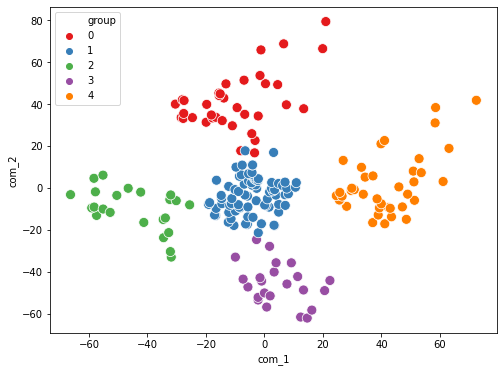

In [121]:
plt.figure(1 , figsize = (8, 6))
sns.scatterplot(x='com_1', y='com_2', hue='group', data=df, s=100, palette="Set1")

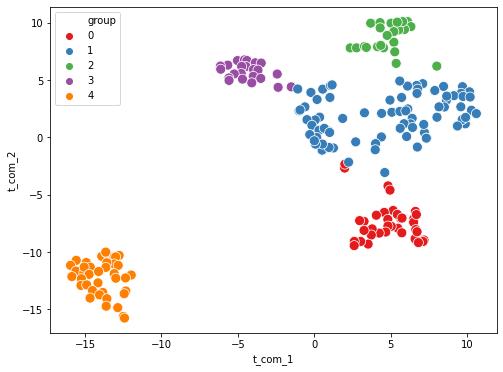

In [122]:
plt.figure(1 , figsize = (8, 6))
sns.scatterplot(x='t_com_1', y='t_com_2', hue='group', data=df, s=100, palette="Set1")

In [128]:
grp0 = df[df["group"]==0].copy()
grp1 = df[df["group"]==1].copy()
grp2 = df[df["group"]==2].copy()
grp3 = df[df["group"]==3].copy()
grp4 = df[df["group"]==4].copy()

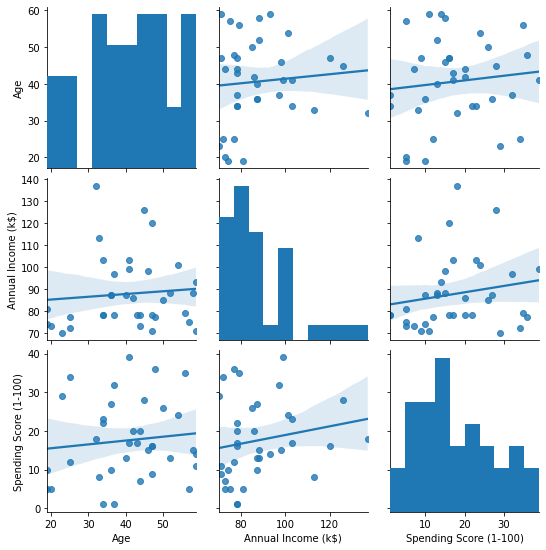

In [137]:
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
sns.pairplot(grp0[cols], kind="reg")

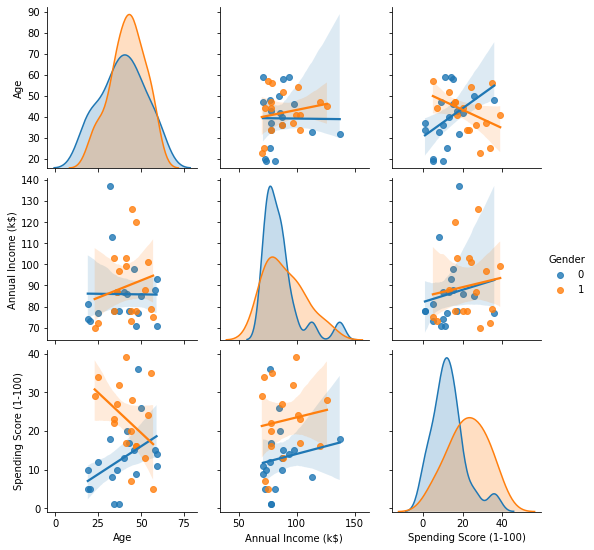

In [138]:
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']
sns.pairplot(grp0[cols], hue='Gender', kind="reg")